In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df = pd.read_parquet('../Data/features_tfidf_removed_categories.parquet.gz')
df.head()

,bagsandluggage,beautyandhealth,capsandhats,drinkware,hoodiesandjackets,kidsapparel,petsupplies,sportsandfitness
CustomerID,,,,,,,,
12347,0.568189,0.000000,0.388631,0.463974,0.366188,0.215148,0.0,0.361210
12348,0.000000,0.000000,0.000000,0.636778,0.000000,0.590556,0.0,0.495740
12350,0.000000,0.000000,0.974051,0.000000,0.000000,0.000000,0.0,0.226331
12356,0.203496,0.436919,0.000000,0.498515,0.393450,0.462330,0.0,0.388101
12359,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000


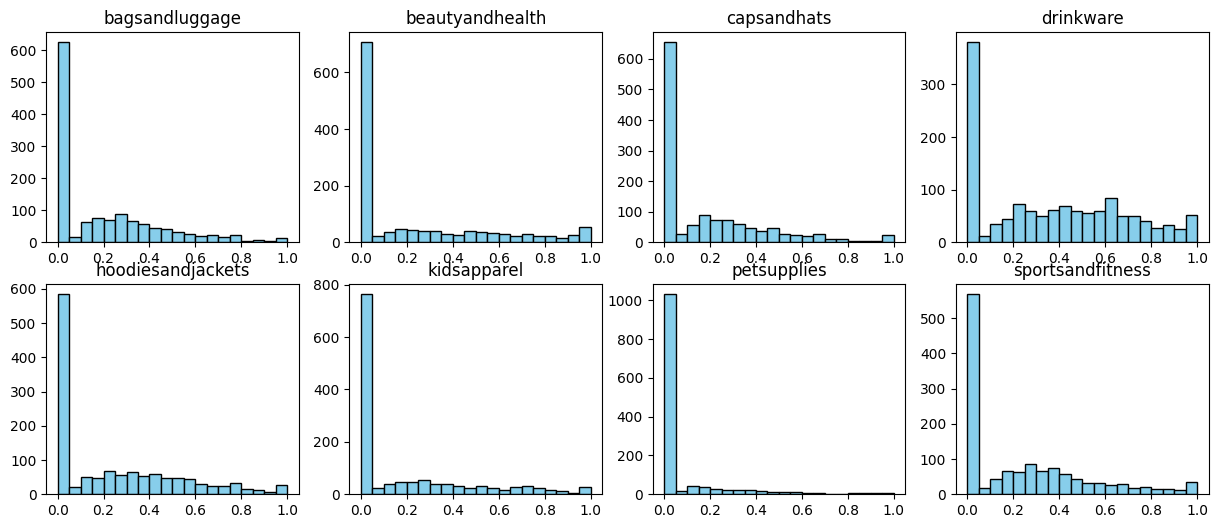

In [3]:
# Creating a 2x5 subplot grid
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# Flatten the axs array to make it easier to iterate
axs = axs.flatten()

# Plot histograms
for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column)

# Mean scaling of the TF-IDF features

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data simultaneously
X = scaler.fit_transform(df.to_numpy())

# PCA

Text(0, 0.5, 'Cumulative Explained Variance')

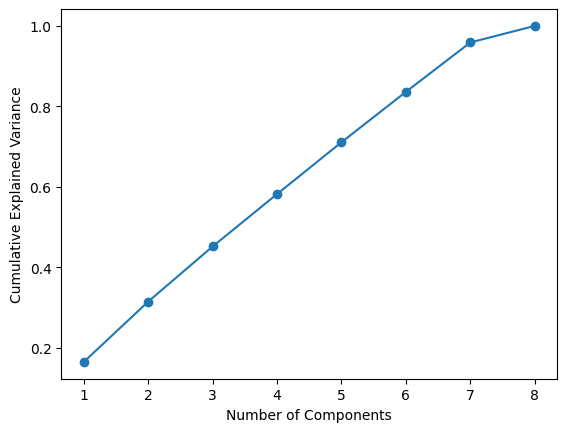

In [6]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the mean-scaled data
pca.fit(X)

plt.plot(list(range(1, df.shape[1] + 1)), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

NOTE: Keep 7 principal components.

In [7]:
pca = PCA(n_components=7)

# Fit PCA to the mean-scaled data and transform it
X = pca.fit_transform(X)

# Clustering

### 1. K-Means

In [10]:
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(3, 15)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 15 times to get the average evaluation scores later on
    for _ in range(10):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmeans = BisectingKMeans(n_clusters=k, 
                                init='k-means++', 
                                algorithm='elkan',
                                n_init=10,
                                bisecting_strategy="largest_cluster")
        kmeans.fit(X)

        # Getting the cluster labels
        labels = kmeans.labels_

        # Get the Inertia (for elbow method)
        inertia_samples.append(kmeans.inertia_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 3
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 12
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 13
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 14
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9


Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

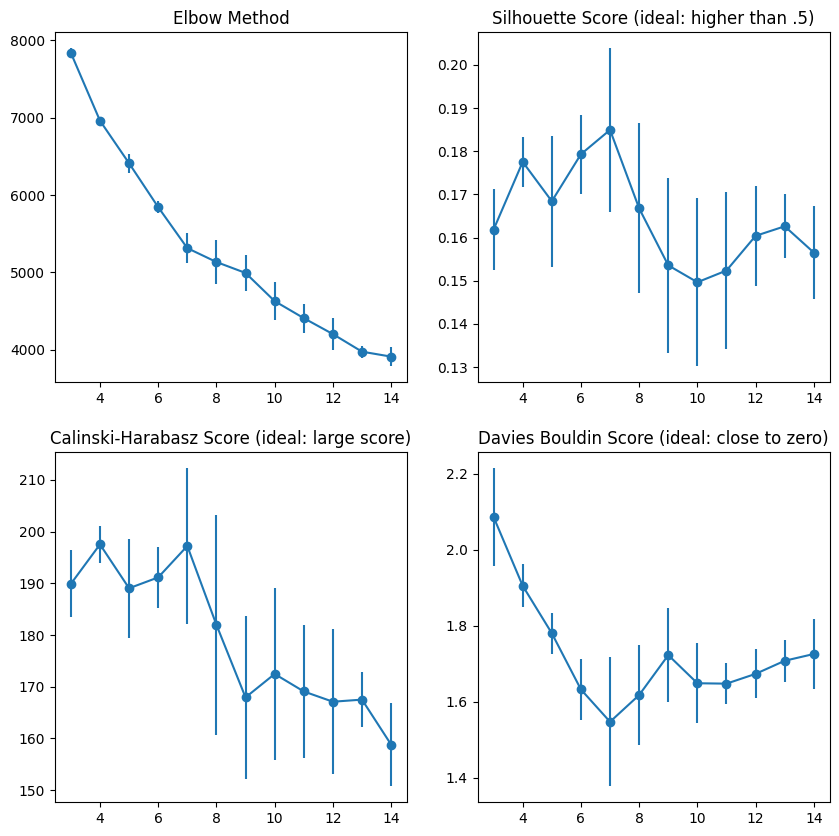

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### NOTE: 8 clusters may be a good candidate (elbow at k=8, silhouette and Calinski-Harabasz scores peak at k=8, and the Davies Bouldin score is lowest at k=8).